In [23]:
#%matplotlib notebook
%matplotlib inline

#dependencies and setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

#files to load 

Crime_data_to_load = "data/Hate_crime.csv"
Police_data_to_load = "data/Police_Employee_data.csv"
Unemployment_data_to_load = "data/Unemployment.csv"
Poverty_data_to_load = "data/poverty_2017.csv"
Unemployment_rate_data_to_load = "data/unemployment_rate.csv"

#read the csv files

crime_df = pd.read_csv(Crime_data_to_load)
police_df = pd.read_csv(Police_data_to_load)
unemployment_df = pd.read_csv(Unemployment_data_to_load)
poverty_df = pd.read_csv(Poverty_data_to_load)
unemployment_rate_df = pd.read_csv(Unemployment_rate_data_to_load)

# clean up crime_df dataframe

In [24]:
#rename columns in crime_df dataframe
crime_df = crime_df.rename(columns={'INCIDENT_ID': 'ID', 'DATA_YEAR': 'Year', 'PUB_AGENCY_UNIT':'Agency Unit','PUB_AGENCY_NAME': 'Agency Name', 
                         'AGENCY_TYPE_NAME': 'Agency Type', 'STATE_ABBR': 'State Abbr.', 'STATE_NAME': 'State', 'DIVISION_NAME':'Division',
                         'REGION_NAME': 'Region', 'POPULATION_GROUP_CODE':'Pop. Group Code', 'POPULATION_GROUP_DESC':'Pop. Group Desc.',
                         'INCIDENT_DATE':'Incident Date','ADULT_VICTIM_COUNT': 'Adult Victim Count', 'JUVENILE_VICTIM_COUNT': 'Juvenile Victim Count',
                         'TOTAL_OFFENDER_COUNT': 'Total Offender Count', 'ADULT_OFFENDER_COUNT': 'Adult Offender Count', 
                         'JUVENILLE_OFFENDER_COUNT':'Juvenille Offender Count','OFFENDER_RACE':'Offender Race', 'OFFENDER_ETHNICITY': 'Offender Ethnicity', 
                         'VICTIM_COUNT': 'Victim Count', 'OFFENSE_NAME':'Offense Name', 'TOTAL_INDIVIDUAL_VICTIMS': 'Total Indiv. Victims',
                         'LOCATION_NAME': 'Location', 'BIAS_DESC':'Bias Desc', 'VICTIM_TYPES': 'Victim Type', 'MULTIPLE_OFFENSE': 
                         'Multiple Offense', 'MULTIPLE_BIAS': 'Multiple Bias'
                        }) 

#drop all null values in dataframe
#crime_df.dropna()

crime_df.head()

,ID,Year,ORI,Agency Name,Agency Unit,Agency Type,State Abbr.,State,Division,Region,...,Offender Race,Offender Ethnicity,Victim Count,Offense Name,Total Indiv. Victims,Location,Bias Desc,Victim Type,Multiple Offense,Multiple Bias
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,...,White,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,3016,1991,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
3,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,3017,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S


# clean up police_df dataframe

In [25]:
#rename columns in police_df dataframe
police_df = police_df.rename(columns={'state_abbr': 'State Abbr.', 'data_year': 'Year','population': 'Population',
                                      'male_officer_ct':'Male Officer Count', 'male_civilian_ct': 'Male Civilian Count',
                                      'male_total_ct':'Male Total Count', 'female_officer_ct':'Female Officer Count',
                                      'female_civilian_ct':'Female Civilian Count', 'female_total_ct':'Female Total Count',
                                      'officer_ct':'Officer Count', 'civilian_ct': 'Civilian Count', "total_pe_ct":
                                      'Total Police Employee Count', 'pe_ct_per_1000':'Police Employee Count/1000'
                                      })

police_df.head()

,State Abbr.,Year,Population,Male Officer Count,Male Civilian Count,Male Total Count,Female Officer Count,Female Civilian Count,Female Total Count,Officer Count,Civilian Count,Total Police Employee Count,Police Employee Count/1000
0,AK,2000,631027,1066.0,208.0,1274.0,103.0,481.0,584.0,1169.0,689.0,1858.0,2.94
1,AL,2000,4488050,9529.0,1847.0,11376.0,769.0,3176.0,3945.0,10298.0,5023.0,15321.0,3.41
2,AR,2000,2934348,5315.0,1130.0,6445.0,541.0,1814.0,2355.0,5856.0,2944.0,8800.0,3.00
3,AS,2000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AZ,2000,5248863,9461.0,3364.0,12825.0,1117.0,4319.0,5436.0,10578.0,7683.0,18261.0,3.48


#  clean up unemployment_df dataframe

In [26]:
#original unemployment dataframe
unemployment_df

#selecting only the columns needed from original dataframe as part of cleaning it up
cleaned_unemployment_df = unemployment_df[["Unnamed: 4", "Unnamed: 6", "Unnamed: 8", "Unnamed: 10", "Unnamed: 12",
                                          "Unnamed: 14", "Unnamed: 16", "Unnamed: 18", "Unnamed: 20", 
                                          "Unnamed: 22", "Unnamed: 23"]]

#renaming column names
cleaned_unemployment_df.columns = ['State', '2009','2010','2011','2012','2013','2014','2015',
                                   '2016','2017','Median Household Income']

#dropping the first row as part of cleaning the dataframe up 
cleaned_unemployment_df = cleaned_unemployment_df.drop(cleaned_unemployment_df.index[0])

#filling in null values with a 0
cleaned_unemployment_df = cleaned_unemployment_df.fillna(0)

cleaned_unemployment_df.head()

,State,2009,2010,2011,2012,2013,2014,2015,2016,2017,Median Household Income
1,Alabama,11.0,10.5,9.6,8.0,7.2,6.8,6.1,5.9,4.4,"$48,193"
2,Alaska,7.7,7.9,7.6,7.1,7.0,6.9,6.5,6.9,7.2,"$74,058"
3,Arizona,9.9,10.4,9.5,8.3,7.7,6.8,6.1,5.4,4.9,"$56,508"
4,Arkansas,7.8,8.2,8.3,7.6,7.2,6.0,5.0,3.9,3.7,"$45,916"
5,California,11.2,12.2,11.7,10.4,8.9,7.5,6.2,5.5,4.8,"$71,785"


# clean up poverty_df dataframe

In [27]:
#original poverty dataframe
poverty_df

#selecting only the columns needed from original dataframe as part of cleaning it up
cleaned_poverty_df = poverty_df[["Name", "Percent", "Lower Bound",
                                "Upper Bound", "Percent.1", "Lower Bound.1", "Upper Bound.1"]]

#renaming column names
cleaned_poverty_df.columns = ['State', 'Percent (All People in Poverty)', 'Lower Bound', 'Upper Bound', 
                              'Percent (Children 0-17 in Poverty)', 'Lower Bound', 'Upper Bound']

#dropping the first row as part of cleaning the dataframe up 
cleaned_poverty_df = cleaned_poverty_df.drop(cleaned_poverty_df.index[0:3])

#filling in null values with a 0
cleaned_poverty_df = cleaned_poverty_df.fillna(0)

cleaned_poverty_df.head()

,State,Percent (All People in Poverty),Lower Bound,Upper Bound,Percent (Children 0-17 in Poverty),Lower Bound,Upper Bound
3,Arkansas,16.3,15.9,16.7,22.5,21.5,23.5
4,California,13.3,13.2,13.4,18.1,17.8,18.4
5,Colorado,10.3,10.0,10.6,12.2,11.5,12.9
6,Connecticut,9.7,9.3,10.1,13.0,12.2,13.8
7,Delaware,13.0,12.4,13.6,17.7,16.5,18.9


# clean up unemployment rate dataframe

In [28]:
unemployment_rate_df.columns

#selecting only the columns needed from original dataframe as part of cleaning it up
cleaned_unemployment_rate_df = unemployment_rate_df[["Year", "Period", "Area", "Unemployment Rate"]]

#renaming column names
cleaned_unemployment_rate_df.columns = ['Year', 'Month', 'State', 'Unemployment Rate']

#dropping the first row as part of cleaning the dataframe up 
cleaned_unemployment_rate_df = cleaned_unemployment_rate_df.drop(cleaned_unemployment_rate_df.index[0])

cleaned_unemployment_rate_df.head()

,Year,Month,State,Unemployment Rate
1,2017,Jan,California,5.6
2,2017,Feb,California,5.4
3,2017,Mar,California,5.1
4,2017,Apr,California,4.7
5,2017,May,California,4.4


# merge crime_df and police_df

In [29]:
#merge the crime dataframe and the police dataframe
crime_police_merged = pd.merge(crime_df, police_df, on=("State Abbr.","Year"))
crime_police_merged.head()

,ID,Year,ORI,Agency Name,Agency Unit,Agency Type,State Abbr.,State,Division,Region,...,Male Officer Count,Male Civilian Count,Male Total Count,Female Officer Count,Female Civilian Count,Female Total Count,Officer Count,Civilian Count,Total Police Employee Count,Police Employee Count/1000
0,70308,2000,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,West,...,1066.0,208.0,1274.0,103.0,481.0,584.0,1169.0,689.0,1858.0,2.94
1,70309,2000,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,West,...,1066.0,208.0,1274.0,103.0,481.0,584.0,1169.0,689.0,1858.0,2.94
2,70310,2000,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,West,...,1066.0,208.0,1274.0,103.0,481.0,584.0,1169.0,689.0,1858.0,2.94
3,70311,2000,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,West,...,1066.0,208.0,1274.0,103.0,481.0,584.0,1169.0,689.0,1858.0,2.94
4,65648,2000,AR0080300,Green Forest,NaN,City,AR,Arkansas,West South Central,South,...,5315.0,1130.0,6445.0,541.0,1814.0,2355.0,5856.0,2944.0,8800.0,3.00


# filter crime & police merged dataframe to data we need

In [30]:
#shorten the merged crime & police dataframe 
crime_police_shorter = crime_police_merged.loc[:, ["State Abbr.", "Year", "Male Officer Count",
                                                   "Female Officer Count","Total Offender Count"]]

#select years between 2014 - 2017
year = (crime_police_shorter["Year"] >= 2014) &  (crime_police_shorter['Year'] <= 2017)
crime_police_shorter = crime_police_shorter.loc[year]

#groupby state and year for analysis of crime and police force per state per year
grouped_data = crime_police_shorter.groupby(['State Abbr.', 'Year'])

#sum up the total male officer count, female officer count and total offender count for each year per state
grouped_data.sum().head()

Male Officer Count  Female Officer Count  \
State Abbr. Year                                             
AK          2014              7254.0                 696.0   
            2015              9600.0                 928.0   
            2016             12716.0                1243.0   
            2017              4540.0                 448.0   
AL          2014            108468.0                8640.0   

                  Total Offender Count  
State Abbr. Year                        
AK          2014                     8  
            2015                     9  
            2016                     6  
            2017                     2  
AL          2014                    11

# Crime Data per Year

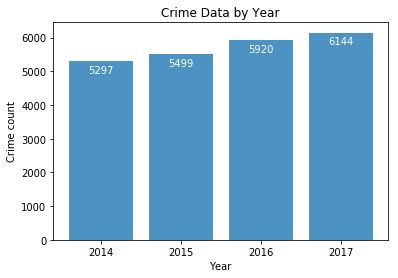

In [31]:
Crime_by_year_df = pd.DataFrame(crime_df, columns = ['Year', 'State Abbr.', 'Total Offender Count','Offender Race'])


Crime_by_year_df = Crime_by_year_df[Crime_by_year_df.Year >= 2014]
#Crime_by_year_df.head()


Crime_count_by_year_df = Crime_by_year_df.groupby([ "Year"])

ccount = Crime_count_by_year_df['Total Offender Count'].sum()
year = Crime_count_by_year_df['Year'].first()

ccnt_summary_df = pd.DataFrame({'Year' : year,
                              'Total Offender count' : ccount,
                              })

ccnt_summary_df.head()

bar_chart = plt.bar(ccnt_summary_df["Year"], ccnt_summary_df["Total Offender count"], alpha=0.8, align='center')


def label_function(labels):
    for label in labels:
        height = label.get_height()
        label_position = height - 400
        plt.text(label.get_x() + label.get_width()/2., label_position,
                 height, color='white', ha='center', va='bottom')

label_function(bar_chart)


plt.title("Crime Data by Year")
plt.xlabel("Year")
plt.ylabel("Crime count")
plt.xticks(np.arange(min(ccnt_summary_df["Year"]), max(ccnt_summary_df["Year"]+1), 1.0))

plt.show()

# Number of Officers by State

In [44]:
police_count_df = pd.DataFrame(police_df, columns = ['Year', 'State Abbr.', 'Male Officer Count','Female Officer Count',
                                                    'Officer Count', 'Population']                               
                              )


police_count_2014_df = police_count_df[police_count_df.Year == 2014]
police_count_2015_df = police_count_df[police_count_df.Year == 2015]
police_count_2016_df = police_count_df[police_count_df.Year == 2016]
police_count_2017_df = police_count_df[police_count_df.Year == 2017]

police_count_2014_df = police_count_2014_df.sort_values('Officer Count', ascending=False)
police_count_2015_df = police_count_2015_df.sort_values('Officer Count', ascending=False)
police_count_2016_df = police_count_2016_df.sort_values('Officer Count', ascending=False)
police_count_2017_df = police_count_2017_df.sort_values('Officer Count', ascending=False)

police_count_2014_df = police_count_2014_df.head(9)
police_count_2015_df = police_count_2015_df.head(9)
police_count_2016_df = police_count_2016_df.head(9)
police_count_2017_df = police_count_2017_df.head(9)


police_count_2014_df = police_count_2014_df.rename(columns={'Male Officer Count' : '2014 Male Officer Count',
                                                           'Female Officer Count' : '2014 Female Officer Count',
                                                           'Officer Count' : '2014 Officer Count',
                                                           'Population' : '2014 Population'
                                                           })
police_count_2014_df = police_count_2014_df.drop(columns='Year')

police_count_2015_df = police_count_2015_df.rename(columns={'Male Officer Count' : '2015 Male Officer Count',
                                                           'Female Officer Count' : '2015 Female Officer Count',
                                                           'Officer Count' : '2015 Officer Count',
                                                           'Population' : '2015 Population'
                                                           })
police_count_2015_df = police_count_2015_df.drop(columns='Year')

police_count_2016_df = police_count_2016_df.rename(columns={'Male Officer Count' : '2016 Male Officer Count',
                                                           'Female Officer Count' : '2016 Female Officer Count',
                                                           'Officer Count' : '2016 Officer Count',
                                                           'Population' : '2016 Population'
                                                           })
police_count_2016_df = police_count_2016_df.drop(columns='Year')

police_count_2017_df = police_count_2017_df.rename(columns={'Male Officer Count' : '2017 Male Officer Count',
                                                           'Female Officer Count' : '2017 Female Officer Count',
                                                           'Officer Count' : '2017 Officer Count',
                                                           'Population' : '2017 Population'
                                                           })
police_count_2017_df = police_count_2017_df.drop(columns='Year')

police_count_2014_2015_df = pd.merge(police_count_2014_df, police_count_2015_df, on='State Abbr.')
police_count_2016_2017_df = pd.merge(police_count_2016_df, police_count_2017_df, on='State Abbr.')
police_count_2014_2017_df = pd.merge(police_count_2014_2015_df, police_count_2016_2017_df, on='State Abbr.')
police_count_2014_2017_df


,State Abbr.,2014 Male Officer Count,2014 Female Officer Count,2014 Officer Count,2014 Population,2015 Male Officer Count,2015 Female Officer Count,2015 Officer Count,2015 Population,2016 Male Officer Count,2016 Female Officer Count,2016 Officer Count,2016 Population,2017 Male Officer Count,2017 Female Officer Count,2017 Officer Count,2017 Population
0,CA,68250.0,10193.0,78443.0,38970399,68706.0,10167.0,78873.0,39469712,68699.0,10306.0,79005.0,39454294,68403.0,10337.0,78740.0,39713887
1,NY,54625.0,8302.0,62927.0,21799396,55464.0,8678.0,64142.0,21811666,56289.0,9053.0,65342.0,21809118,53305.0,9128.0,62433.0,21794544
2,TX,50971.0,6308.0,57279.0,27240637,50571.0,6614.0,57185.0,27801749,51071.0,6760.0,57831.0,28685684,38225.0,5555.0,43780.0,28467008
3,FL,39512.0,6409.0,45921.0,20007473,42193.0,6937.0,49130.0,20388277,42062.0,7426.0,49488.0,20750677,38844.0,7132.0,45976.0,21152963
4,GA,32240.0,6483.0,38723.0,10503162,32796.0,6586.0,39382.0,10812277,32482.0,6670.0,39152.0,10662998,20520.0,4174.0,24694.0,10885394
5,IL,29622.0,4958.0,34580.0,13023192,30941.0,4945.0,35886.0,13117464,29537.0,4899.0,34436.0,12985528,20955.0,4322.0,25277.0,12911525
6,NJ,27989.0,2744.0,30733.0,9134732,33986.0,3229.0,37215.0,9310977,30890.0,2992.0,33882.0,9005202,28308.0,3033.0,31341.0,9066144
7,NC,23945.0,2950.0,26895.0,10646776,24826.0,3060.0,27886.0,11015159,24258.0,2975.0,27233.0,10798726,24756.0,3309.0,28065.0,11965888


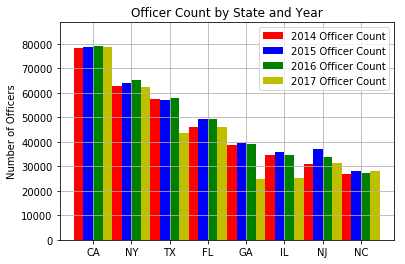

In [47]:
# Setting the positions and width for the bars
pos = list(range(len(police_count_2014_2017_df['State Abbr.'])))
width = 0.25


# Plotting the bars
fig, ax = plt.subplots()

# Create a bar with 2014 data,
# in position pos,
plt.bar(pos, 
        #using 2014 data,
        police_count_2014_2017_df['2014 Officer Count'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=1, 
        # with color
        color='r', 
        # with label the first value in State Abbr.
        label=police_count_2014_2017_df['State Abbr.'][0])

# Create a bar with 2015 data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using 2015 data,
        police_count_2014_2017_df['2015 Officer Count'],
        # of width
        width, 
        # with alpha 0.5
        alpha=1, 
        # with color
        color='b', 
        # with label the second value in State Abbr.
        label=police_count_2014_2017_df['State Abbr.'][1])


# Create a bar with 2016 data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using 2016 data,
        police_count_2014_2017_df['2016 Officer Count'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=1, 
        # with color
        color='g', 
        # with label the third value in State Abbr.
        label=police_count_2014_2017_df['State Abbr.'][2])


# Create a bar with 2017 data,
# in position pos + some width buffer,
plt.bar([p + width*3 for p in pos], 
        #using 2017 data,
        police_count_2014_2017_df['2017 Officer Count'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=1, 
        # with color
        color='y',
        # with label the third value in State Abbr.
        label=police_count_2014_2017_df['State Abbr.'][3])


# Set the y axis label
ax.set_ylabel('Number of Officers')

# Set the chart's title
ax.set_title('Officer Count by State and Year')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(police_count_2014_2017_df['State Abbr.'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos) - 0.5, 8 + width)
plt.ylim([0, max(police_count_2014_2017_df['2017 Officer Count']+10000)])


# Adding the legend and showing the plot
plt.legend(['2014 Officer Count', '2015 Officer Count', '2016 Officer Count', '2017 Officer Count'], loc='upper right')
plt.grid()
plt.show()


# Crimes per State

Text(0, 0.5, 'Total Crime Count')

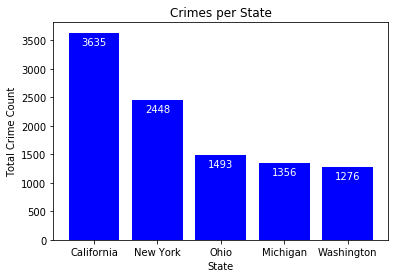

In [44]:
#create new dataframe with columns needed for graph
df = pd.DataFrame(crime_df, columns = ['Year', 'State', 'Total Offender Count'])

#select years 2014-2017
only_year_2014_2017_4 = (df["Year"] >= 2014) & (df["Year"] <= 2017)

crime_df_4 = df.loc[only_year_2014_2017_4]

#groupby state
groupby_year_state = crime_df_4.groupby(["State"])

#get the total sum of offender count after grouping by the state
crime_year_state = groupby_year_state["Total Offender Count"].sum()

#create series into dataframe
crime_year_state = pd.DataFrame(crime_year_state)

#sort the total offender count in descending order to get the states with highest count
crime_year_state = crime_year_state.sort_values(["Total Offender Count"],ascending=[False]) 

#reset the index
crime_year_state = crime_year_state.reset_index()

#select the top 5 states with highest total offender count 
crime_year_state = crime_year_state.head()

#create bar graph

#set the x axis
state = (crime_year_state["State"])

#set the y axis
crime = (crime_year_state["Total Offender Count"])

#plot the line graph for California 
bar_chart = plt.bar(state, crime, color="b", align="center")

def label_function(labels):
    for label in labels:
        height = label.get_height()
        label_position = height - 250
        plt.text(label.get_x() + label.get_width()/2., label_position,
                 height, color='white', ha='center', va='bottom')

label_function(bar_chart)

#set labels
plt.title("Crimes per State")
plt.xlabel("State")
plt.ylabel("Total Crime Count")

# California Crime Trend From 2014-2017

In [11]:
crime_df.head()

#create new dataframe with columns needed for line graph
df = pd.DataFrame(crime_df, columns = ['Year', 'State', 'Total Offender Count'])

#select only years 2014-2017
only_year_2014_2017 = (df["Year"] >= 2014) & (df["Year"] <= 2017)

crime_df_1 = df.loc[only_year_2014_2017]

#select only California from the dataframe 
only_california = crime_df_1.loc[crime_df_1["State"] == "California", :]

only_california.head()

,Year,State,Total Offender Count
169430,2014,California,1
169431,2014,California,1
169432,2014,California,1
169433,2014,California,0
169434,2014,California,0


In [12]:
#groupby the year
groupby_year_1 = only_california.groupby(["Year"])

#take the sum of total offender count after using groupby
crime_count_2014 = groupby_year_1["Total Offender Count"].sum()

#convert from series to dataframe
crime_count_2014 = pd.DataFrame(crime_count_2014)

#reset the index
crime_count_2014 = crime_count_2014.reset_index()

crime_count_2014

,Year,Total Offender Count
0,2014,800
1,2015,839
2,2016,982
3,2017,1014


Text(0, 0.5, 'Year')

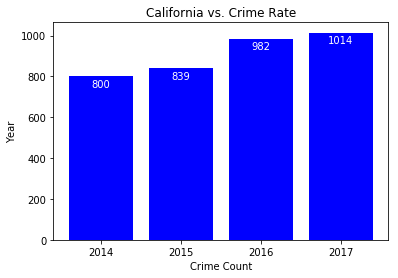

In [38]:
#set the x axis
years = (crime_count_2014["Year"])

#set the y axis
crime = (crime_count_2014["Total Offender Count"])

#plot the line graph for California 

bar_chart = plt.bar(years, crime, color="b", align="center")

def label_function(labels):
    for label in labels:
        height = label.get_height()
        label_position = height - 60
        plt.text(label.get_x() + label.get_width()/2., label_position,
                 height, color='white', ha='center', va='bottom')

label_function(bar_chart)

#set tick locations
plt.xticks(np.arange(min(years), max(years+1), 1.0))

#set labels
plt.title("California vs. Crime Rate")
plt.xlabel("Crime Count")
plt.ylabel("Year")

# New York Crime Trend From 2014-2017

In [14]:
crime_df.head()

#create new dataframe with columns needed for line graph
df = pd.DataFrame(crime_df, columns = ['Year', 'State', 'Total Offender Count'])

#select only years 2014-2017
only_year_2014_2017_2 = (df["Year"] >= 2014) & (df["Year"] <= 2017)

crime_df_2 = df.loc[only_year_2014_2017]

#select only New York from the dataframe 
only_newyork = crime_df_2.loc[crime_df_1["State"] == "New York", :]

only_newyork.head()

,Year,State,Total Offender Count
172610,2014,New York,1
172611,2014,New York,1
172612,2014,New York,1
172613,2014,New York,1
172614,2014,New York,1


In [15]:
#groupby the year
groupby_year_2 = only_newyork.groupby(["Year"])

#take the sum of total offender count after using groupby
crime_count_2014_2 = groupby_year_2["Total Offender Count"].sum()

#convert from series to dataframe
crime_count_2014_2 = pd.DataFrame(crime_count_2014_2)

#reset the index
crime_count_2014_2 = crime_count_2014_2.reset_index()

crime_count_2014_2

,Year,Total Offender Count
0,2014,626
1,2015,575
2,2016,628
3,2017,619


Text(0, 0.5, 'Year')

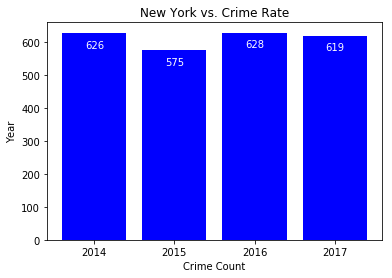

In [39]:
#set the x axis
years = (crime_count_2014_2["Year"])

#set the y axis
crime = (crime_count_2014_2["Total Offender Count"])

#plot the line graph for California 

bar_chart = plt.bar(years, crime, color="b", align="center")

def label_function(labels):
    for label in labels:
        height = label.get_height()
        label_position = height - 50
        plt.text(label.get_x() + label.get_width()/2., label_position,
                 height, color='white', ha='center', va='bottom')

label_function(bar_chart)


#set tick locations
plt.xticks(np.arange(min(years), max(years+1), 1.0))

#set labels
plt.title("New York vs. Crime Rate")
plt.xlabel("Crime Count")
plt.ylabel("Year")

# Ohio Trend From 2014-2017

In [17]:
crime_df.head()

#create new dataframe with columns needed for line graph
df = pd.DataFrame(crime_df, columns = ['Year', 'State', 'Total Offender Count'])

#select only years 2014-2017
only_year_2014_2017_3 = (df["Year"] >= 2014) & (df["Year"] <= 2017)

crime_df_3 = df.loc[only_year_2014_2017]

#select only Ohio from the dataframe 
only_ohio = crime_df_1.loc[crime_df_1["State"] == "Ohio", :]

only_ohio.head()

,Year,State,Total Offender Count
173155,2014,Ohio,1
173156,2014,Ohio,1
173157,2014,Ohio,1
173158,2014,Ohio,0
173159,2014,Ohio,1


In [18]:
#groupby the year
groupby_year_3 = only_ohio.groupby(["Year"])

#take the sum of total offender count after using groupby
crime_count_2014_3 = groupby_year_3["Total Offender Count"].sum()

#convert from series to dataframe
crime_count_2014_3 = pd.DataFrame(crime_count_2014_3)

#reset the index
crime_count_2014_3 = crime_count_2014_3.reset_index()

crime_count_2014_3

,Year,Total Offender Count
0,2014,378
1,2015,358
2,2016,407
3,2017,350


Text(0, 0.5, 'Year')

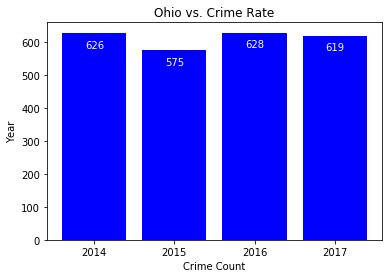

In [34]:
#set the x axis
years = (crime_count_2014_2["Year"])

#set the y axis
crime = (crime_count_2014_2["Total Offender Count"])

#plot the line graph for California 

bar_chart = plt.bar(years, crime, color="b", align="center")

#set tick locations
plt.xticks(np.arange(min(years), max(years+1), 1.0))

def label_function(labels):
    for label in labels:
        height = label.get_height()
        label_position = height - 50
        plt.text(label.get_x() + label.get_width()/2., label_position,
                 height, color='white', ha='center', va='bottom')

label_function(bar_chart)

#set labels
plt.title("Ohio vs. Crime Rate")
plt.xlabel("Crime Count")
plt.ylabel("Year")